# Model CNN pour classification

In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

## Dataset

In [4]:
img_height = 32
img_width = 32
batch_size = 32

train_data = tf.keras.utils.image_dataset_from_directory(
    '../Data/gems_images/train',
    validation_split=0.2,          # 20% for validation
    subset="training",
    seed=42,                       # IMPORTANT: ensures same split every time
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    '../Data/gems_images/train',
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_data = tf.keras.utils.image_dataset_from_directory(
    '../Data/gems_images/test',
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 2856 files belonging to 87 classes.
Using 2285 files for training.
Found 2856 files belonging to 87 classes.
Using 571 files for validation.
Found 363 files belonging to 87 classes.


## Data visualisation

Class names: ['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'Serpentine', 'Sodalite',

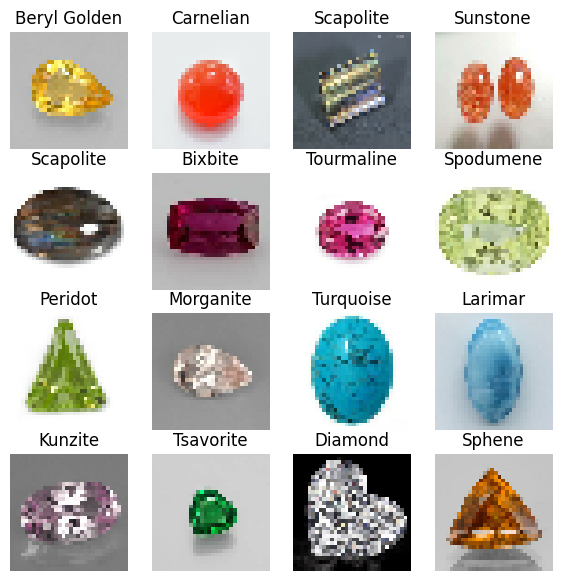

In [14]:
class_names = train_data.class_names
print("Class names:", class_names)
# Data visualisation
plt.figure(figsize=(7, 7))
for images, labels in train_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

## creation du model

In [55]:
num_classes = len(class_names)

modelCNN = tf.keras.Sequential([

    # Normalize
    tf.keras.layers.Rescaling(1./255),

    # --- Block 1 ---
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    # --- Block 2 ---
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    # --- Block 3 ---
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.4),

    # Flatten + Dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [56]:
modelCNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [57]:
history = modelCNN.fit(
    train_data,
    validation_data=validation_data,
    epochs=20
)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.0753 - loss: 4.5911 - val_accuracy: 0.0088 - val_loss: 4.8379
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1707 - loss: 3.3369 - val_accuracy: 0.0088 - val_loss: 5.7439
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.2565 - loss: 2.8040 - val_accuracy: 0.0245 - val_loss: 6.3165
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3221 - loss: 2.4844 - val_accuracy: 0.0455 - val_loss: 5.2608
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3681 - loss: 2.2234 - val_accuracy: 0.0806 - val_loss: 4.3330
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.3996 - loss: 2.0606 - val_accuracy: 0.1891 - val_loss: 3.0677
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4236 - loss: 1.9390 - val_accuracy: 0.1996 - val_loss: 3.1690
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4853 - loss: 1.7496 - val_accuracy: 0.3783 - v

## Plot training curves

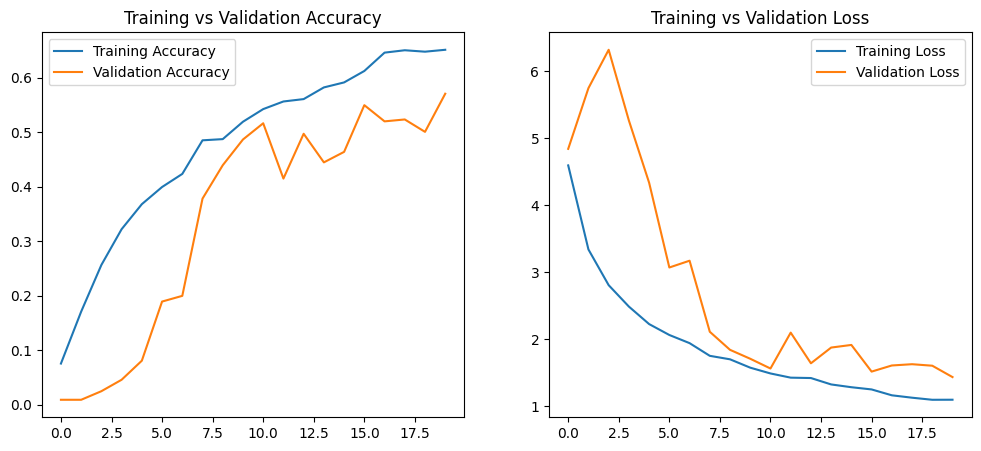

In [58]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [59]:
modelCNN.fit(test_data,verbose=2)

12/12 - 0s - 37ms/step - accuracy: 0.4463 - loss: 1.9045


In [60]:
modelCNN.evaluate(test_data,verbose=2)

12/12 - 0s - 19ms/step - accuracy: 0.5372 - loss: 1.5425


[1.5424636602401733, 0.5371900796890259]

In [61]:
for images, labels in test_data.take(1):
    prediction = modelCNN.predict(images)
    predicted_labels = np.argmax(prediction, axis=1)
    for i in range(10):
        print(f"Image {i+1}: True label: {class_names[labels[i]]}, Predicted label: {class_names[predicted_labels[i]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Image 1: True label: Moonstone, Predicted label: Opal
Image 2: True label: Quartz Beer, Predicted label: Quartz Beer
Image 3: True label: Turquoise, Predicted label: Turquoise
Image 4: True label: Lapis Lazuli, Predicted label: Lapis Lazuli
Image 5: True label: Iolite, Predicted label: Sapphire Blue
Image 6: True label: Pyrope, Predicted label: Rhodochrosite
Image 7: True label: Sodalite, Predicted label: Iolite
Image 8: True label: Chrysoprase, Predicted label: Chrysoprase
Image 9: True label: Blue Lace Agate, Predicted label: Chalcedony Blue
Image 10: True label: Andradite, Predicted label: Andradite
